# Data collection & Valuation - Ethereum

In [3]:
import yfinance as yf
import pandas as pd

# Fetch Ethereum price data
eth = yf.Ticker("ETH-USD")
eth_price = eth.history(start="2021-01-01", end="2023-12-31")
eth_price = eth_price[['Close']]
eth_price.columns = ['price']

In [8]:
pip install requests


Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install etherscan-python

  Obtaining dependency information for etherscan-python from https://files.pythonhosted.org/packages/3e/5e/db81aa2218466e90118d0da012c07c43cdc432f8726bde89a35323381a49/etherscan_python-2.1.0-py3-none-any.whl.metadata
Note: you may need to restart the kernel to use updated packages.


In [4]:
def get_network_data(asset, start_date, end_date, api_key):
    base_url = "https://api.etherscan.io/api"
    network_data = []
    current_date = datetime.strptime(start_date, "%Y-%m-%d")
    end_date = datetime.strptime(end_date, "%Y-%m-%d")
    
    while current_date <= end_date:
        params = {
            'module': 'proxy',
            'action': 'eth_blockNumber',
            'apikey': api_key,
        }
        response = requests.get(base_url, params=params)
        print(f"API Response for {current_date.strftime('%Y-%m-%d')}:")
        print(f"Status Code: {response.status_code}")
        print(f"Response Content: {response.text}")
        
        if response.status_code == 200:
            data = response.json()
            if 'result' in data:
                block_number = int(data['result'], 16)
                network_data.append({
                    'Date': current_date.strftime("%Y-%m-%d"),
                    'Block_Number': block_number
                })
            else:
                print(f"Unexpected API response: {data}")
                network_data.append({
                    'Date': current_date.strftime("%Y-%m-%d"),
                    'Block_Number': np.nan
                })
        else:
            print(f"HTTP Error: {response.status_code}")
            network_data.append({
                'Date': current_date.strftime("%Y-%m-%d"),
                'Block_Number': np.nan
            })
        
        current_date += timedelta(days=1)
        time.sleep(2)  # Increased sleep time to avoid rate limiting
    
    df = pd.DataFrame(network_data)
    df['Date'] = pd.to_datetime(df['Date'])
    return df.set_index('Date')

In [5]:
def collect_data(asset, start_date, end_date, api_key):
    try:
        financial_data = get_financial_data(asset, start_date, end_date)
        
        supply = get_circulating_supply(api_key)
        if supply is not None:
            financial_data['Market_Cap'] = financial_data['Close'] * supply
        else:
            financial_data['Market_Cap'] = np.nan
        
        network_data = get_network_data(asset, start_date, end_date, api_key)
        tech_data = get_tech_development_data(asset, start_date, end_date)
        ecosystem_data = get_ecosystem_data(asset, start_date, end_date)
        
        # Ensure all DataFrames have the same index
        all_data = [financial_data, network_data, tech_data, ecosystem_data]
        for df in all_data:
            df.index = pd.to_datetime(df.index).tz_localize(None)
        
        combined_data = pd.concat(all_data, axis=1)
        combined_data = combined_data.ffill().bfill()  # Forward and backward fill any missing data
        
        return combined_data
    except Exception as e:
        print(f"An error occurred during data collection: {str(e)}")
        return None

In [8]:
# Set your parameters
asset = "ETH-USD"
start_date = "2023-01-01"
end_date = "2023-12-31"  # Reduced date range for testing
api_key = "BF5DWVUJ8RXHC4Z3UK34X89X47ZSW6ZHWF"

# Collect the data
data = collect_data(asset, start_date, end_date, api_key)

if data is not None:
    # Save the data
    data.to_csv('blockchain_asset_valuation_data.csv')
    print(data.head())
    print(f"Data shape: {data.shape}")
else:
    print("Data collection failed.")

API Response for 2023-01-01:
Status Code: 200
Response Content: {"jsonrpc":"2.0","id":83,"result":"0x1388dea"}

API Response for 2023-01-02:
Status Code: 200
Response Content: {"jsonrpc":"2.0","id":83,"result":"0x1388deb"}

API Response for 2023-01-03:
Status Code: 200
Response Content: {"jsonrpc":"2.0","id":83,"result":"0x1388deb"}

API Response for 2023-01-04:
Status Code: 200
Response Content: {"jsonrpc":"2.0","id":83,"result":"0x1388dec"}

API Response for 2023-01-05:
Status Code: 200
Response Content: {"jsonrpc":"2.0","id":83,"result":"0x1388deb"}

API Response for 2023-01-06:
Status Code: 200
Response Content: {"jsonrpc":"2.0","id":83,"result":"0x1388dec"}

API Response for 2023-01-07:
Status Code: 200
Response Content: {"jsonrpc":"2.0","id":83,"result":"0x1388dec"}

API Response for 2023-01-08:
Status Code: 200
Response Content: {"jsonrpc":"2.0","id":83,"result":"0x1388dec"}

API Response for 2023-01-09:
Status Code: 200
Response Content: {"jsonrpc":"2.0","id":83,"result":"0x138

Mean Squared Error: 1998.0583118411798
R-squared: 0.9668186656465367
Close: 5900238255786604.0
Volume: 7.0
Market_Cap: -5900238255786396.0
Block_Number: -5.384181381466387
Tech_Activity: -4.73938627468765
Ecosystem_Growth: 12.619239833044992


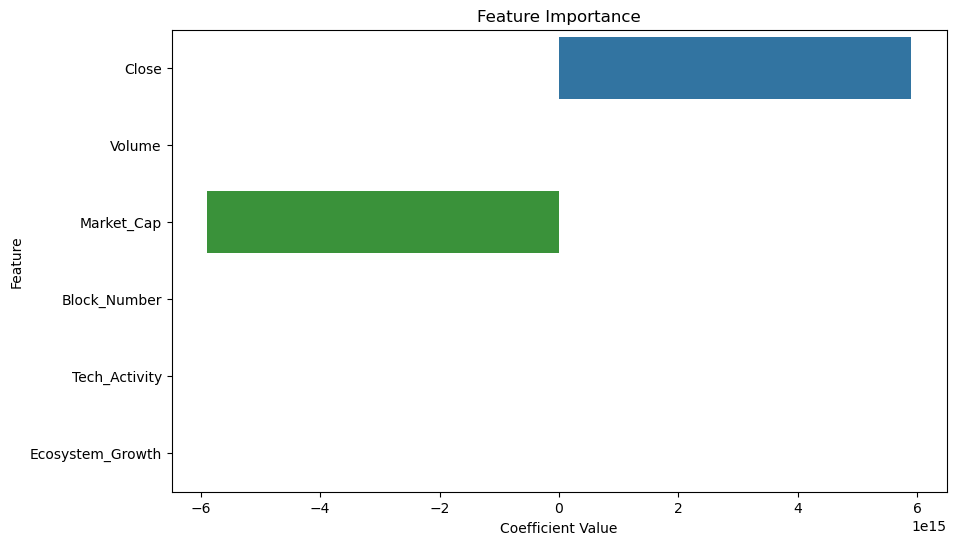


Forecasted values for the next 30 days:
2024-01-01    2292.010292
2024-01-02    2292.026051
2024-01-03    2292.021547
2024-01-04    2292.022835
2024-01-05    2292.022467
2024-01-06    2292.022572
2024-01-07    2292.022542
2024-01-08    2292.022550
2024-01-09    2292.022548
2024-01-10    2292.022549
2024-01-11    2292.022548
2024-01-12    2292.022548
2024-01-13    2292.022548
2024-01-14    2292.022548
2024-01-15    2292.022548
2024-01-16    2292.022548
2024-01-17    2292.022548
2024-01-18    2292.022548
2024-01-19    2292.022548
2024-01-20    2292.022548
2024-01-21    2292.022548
2024-01-22    2292.022548
2024-01-23    2292.022548
2024-01-24    2292.022548
2024-01-25    2292.022548
2024-01-26    2292.022548
2024-01-27    2292.022548
2024-01-28    2292.022548
2024-01-29    2292.022548
2024-01-30    2292.022548
Freq: D, Name: predicted_mean, dtype: float64


/Users/zeinabkahin/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/zeinabkahin/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/zeinabkahin/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


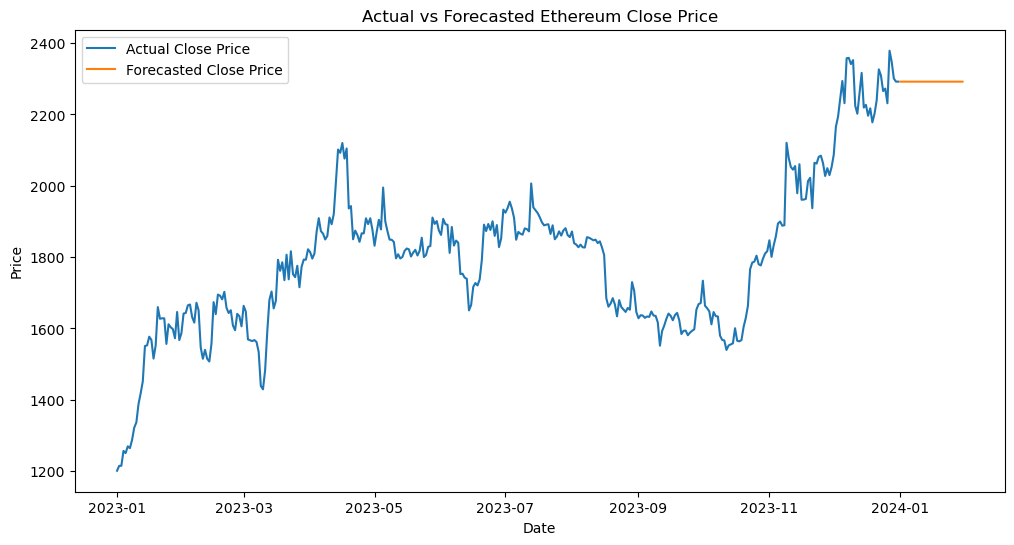


Average price for different levels of tech activity:
Tech_Activity
0     1750.555206
1     1879.345642
2     1816.378235
3     1792.485107
4     1753.415283
         ...     
95    1764.281637
96    1928.090601
97    1784.891741
98    1864.851270
99    1705.318970
Name: Close, Length: 98, dtype: float64


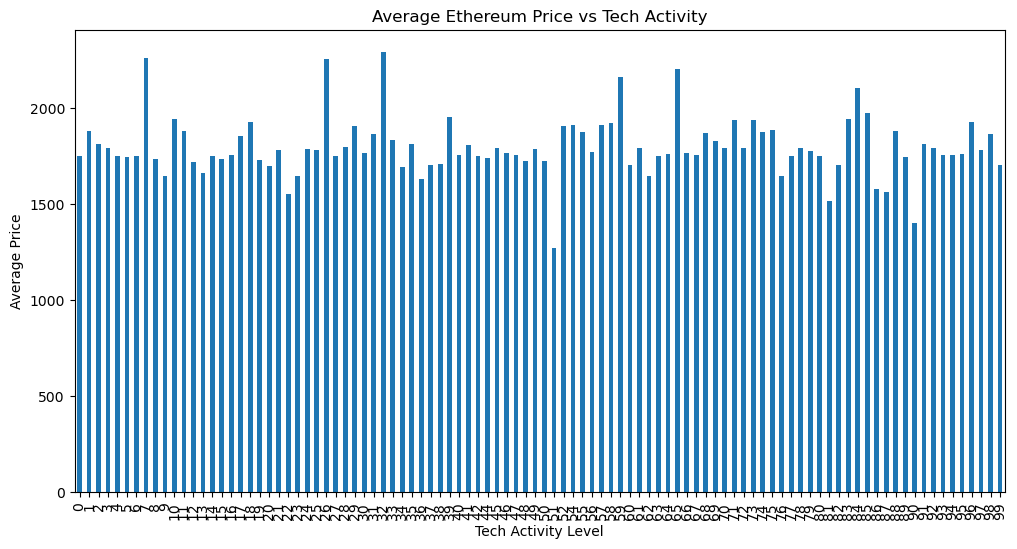


Average price for different levels of ecosystem growth:
Ecosystem_Growth
0      1200.964844
1      1214.656616
2      1214.778809
3      1256.526611
4      1250.438599
          ...     
360    2378.739990
361    2347.566162
362    2300.690674
363    2292.065430
364    2292.065430
Name: Close, Length: 365, dtype: float64


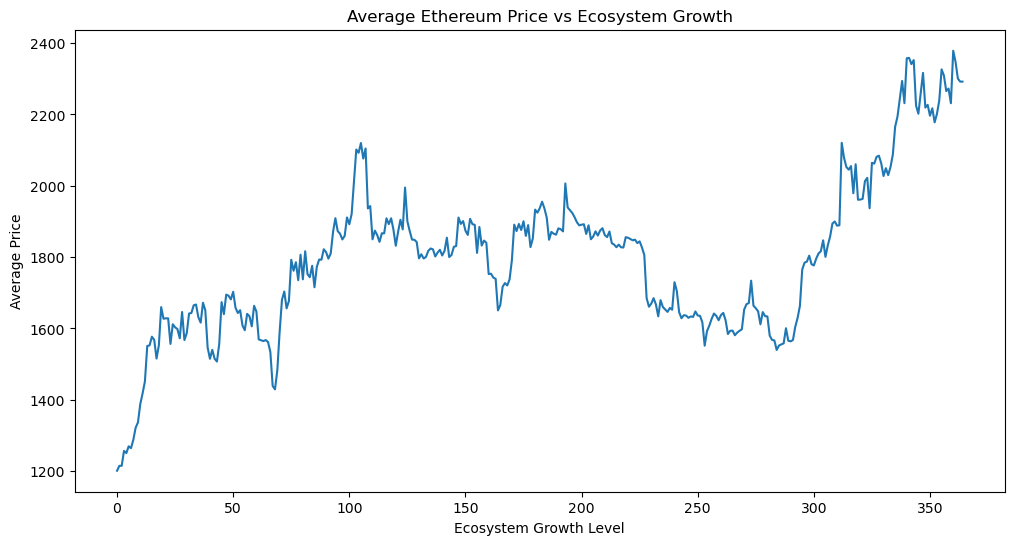

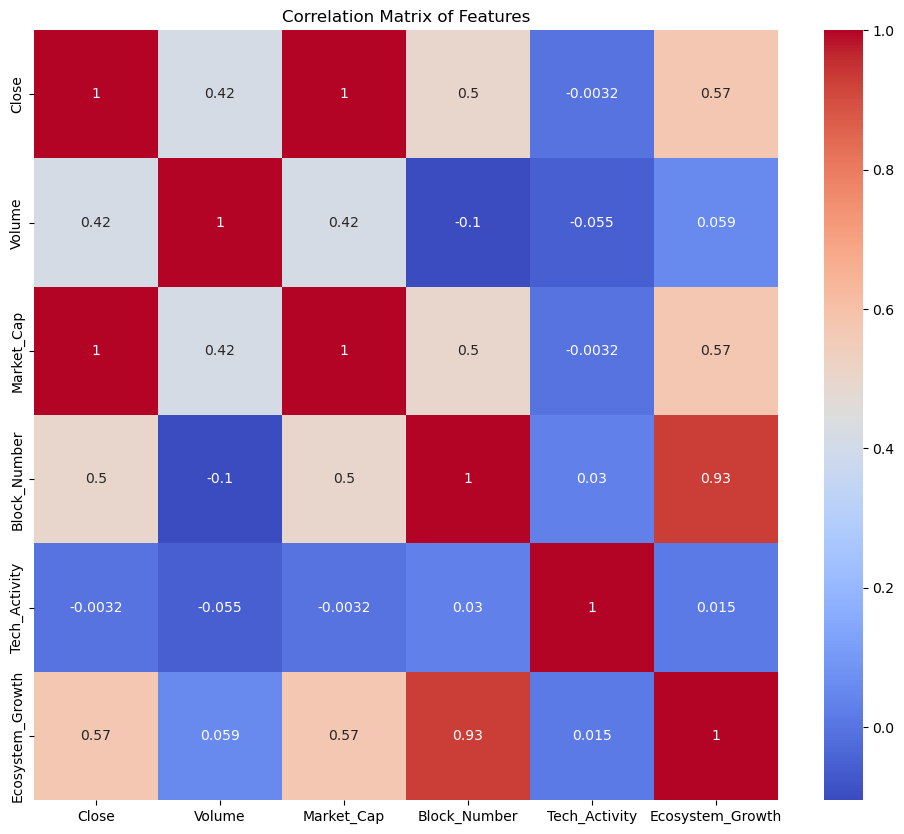

In [10]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv('blockchain_asset_valuation_data.csv', index_col='Date', parse_dates=True)

# Prepare the data
X = data[['Close', 'Volume', 'Market_Cap', 'Block_Number', 'Tech_Activity', 'Ecosystem_Growth']]
y = data['Close'].shift(-1)  # We're predicting the next day's price

# Remove the last row as it will have a NaN value for y
X = X[:-1]
y = y[:-1]

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Print the coefficients
for name, coef in zip(X.columns, model.coef_):
    print(f"{name}: {coef}")

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=model.coef_, y=X.columns)
plt.title('Feature Importance')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()

# Time series analysis for dynamic behavior
def forecast_value(data, steps=30):
    model = ARIMA(data['Close'], order=(1,1,1))
    results = model.fit()
    forecast = results.forecast(steps=steps)
    return forecast

future_forecast = forecast_value(data)
print("\nForecasted values for the next 30 days:")
print(future_forecast)

# Plot actual vs forecasted values
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'], label='Actual Close Price')
plt.plot(pd.date_range(start=data.index[-1], periods=31)[1:], future_forecast, label='Forecasted Close Price')
plt.title('Actual vs Forecasted Ethereum Close Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Analyze the impact of technological updates
tech_impact = data.groupby('Tech_Activity')['Close'].mean().sort_index()
print("\nAverage price for different levels of tech activity:")
print(tech_impact)

# Visualize tech activity impact
plt.figure(figsize=(12, 6))
tech_impact.plot(kind='bar')
plt.title('Average Ethereum Price vs Tech Activity')
plt.xlabel('Tech Activity Level')
plt.ylabel('Average Price')
plt.show()

# Analyze ecosystem growth impact
ecosystem_impact = data.groupby('Ecosystem_Growth')['Close'].mean().sort_index()
print("\nAverage price for different levels of ecosystem growth:")
print(ecosystem_impact)

# Visualize ecosystem growth impact
plt.figure(figsize=(12, 6))
ecosystem_impact.plot(kind='line')
plt.title('Average Ethereum Price vs Ecosystem Growth')
plt.xlabel('Ecosystem Growth Level')
plt.ylabel('Average Price')
plt.show()

# Correlation analysis
correlation_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import TimeSeriesSplit

# Scale all features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

# Check for multicollinearity
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
    return vif_data

print("Variance Inflation Factors:")
print(calculate_vif(X_scaled_df))

# PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)
print("\nExplained Variance Ratio:")
print(pca.explained_variance_ratio_)

# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_scaled, y)
print("\nRandom Forest Feature Importances:")
for feature, importance in zip(X.columns, rf_model.feature_importances_):
    print(f"{feature}: {importance}")

# Time Series Cross-Validation
tscv = TimeSeriesSplit(n_splits=5)
rf_scores = []
for train_index, test_index in tscv.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    rf_model.fit(X_train, y_train)
    rf_scores.append(rf_model.score(X_test, y_test))

print("\nRandom Forest Cross-Validation Scores:")
print(rf_scores)
print(f"Mean R-squared: {np.mean(rf_scores)}")

Variance Inflation Factors:
            feature       VIF
0             Close       inf
1            Volume  1.600779
2        Market_Cap       inf
3      Block_Number  9.409722
4     Tech_Activity  1.003990
5  Ecosystem_Growth  9.385916

Explained Variance Ratio:
[5.18939225e-01 2.26109733e-01 1.65100500e-01 8.07082181e-02
 9.14232364e-03 4.62176339e-32]

Random Forest Feature Importances:
Close: 0.44193384101730826
Volume: 0.006692432341799747
Market_Cap: 0.4313761071518326
Block_Number: 0.021235722904133593
Tech_Activity: 0.00656953055120457
Ecosystem_Growth: 0.09219236603372132


/Users/zeinabkahin/anaconda3/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)



Random Forest Cross-Validation Scores:
[-1.5200503351667893, -1.3171880908351312, 0.7652015019580113, 0.7385612380751336, -0.6997984093122585]
Mean R-squared: -0.4066548190562068


Mean Squared Error: 2293.6015279529934
R-squared: 0.9619106415855836

Feature Importance:
            feature  importance
2        Market_Cap    0.465568
0             Close    0.438211
5  Ecosystem_Growth    0.065186
3      Block_Number    0.016423
4     Tech_Activity    0.007369
1            Volume    0.007243


/Users/zeinabkahin/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/zeinabkahin/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/zeinabkahin/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/zeinabkahin/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/zeinabkahin/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warni

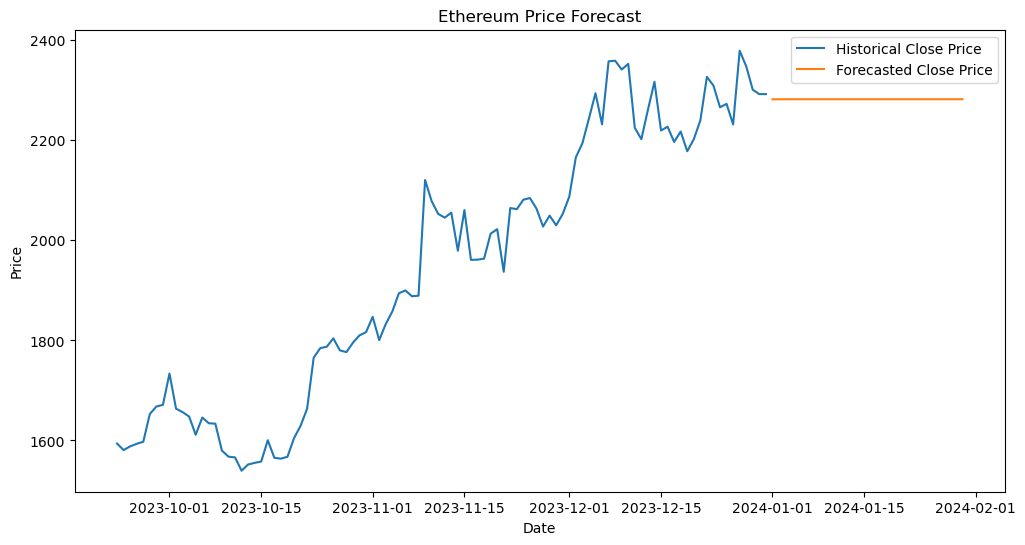


Forecasted prices for the next 30 days:
2024-01-01    2281.643181
2024-01-02    2281.780574
2024-01-03    2281.780574
2024-01-04    2281.780574
2024-01-05    2281.780574
2024-01-06    2281.780574
2024-01-07    2281.780574
2024-01-08    2281.780574
2024-01-09    2281.780574
2024-01-10    2281.780574
2024-01-11    2281.780574
2024-01-12    2281.780574
2024-01-13    2281.780574
2024-01-14    2281.780574
2024-01-15    2281.780574
2024-01-16    2281.780574
2024-01-17    2281.780574
2024-01-18    2281.780574
2024-01-19    2281.780574
2024-01-20    2281.780574
2024-01-21    2281.780574
2024-01-22    2281.780574
2024-01-23    2281.780574
2024-01-24    2281.780574
2024-01-25    2281.780574
2024-01-26    2281.780574
2024-01-27    2281.780574
2024-01-28    2281.780574
2024-01-29    2281.780574
2024-01-30    2281.780574
Freq: D, dtype: float64


In [13]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('blockchain_asset_valuation_data.csv', parse_dates=['Date'], index_col='Date')

# Prepare features and target
features = ['Close', 'Volume', 'Market_Cap', 'Block_Number', 'Tech_Activity', 'Ecosystem_Growth']
X = data[features]
y = data['Close'].shift(-1)  # Predict next day's closing price

# Remove the last row as it will have a NaN value for y
X = X[:-1]
y = y[:-1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Feature importance
feature_importance = pd.DataFrame({'feature': features, 'importance': model.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False)
print("\nFeature Importance:")
print(feature_importance)

# Forecast next 30 days
last_date = data.index[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=30)
future_features = X.iloc[-1].to_dict()
forecasted_prices = []

for _ in range(30):
    prediction = model.predict([list(future_features.values())])[0]
    forecasted_prices.append(prediction)
    future_features['Close'] = prediction
    future_features['Ecosystem_Growth'] += 1  # Assume ecosystem grows by 1 each day

forecasted_prices = pd.Series(forecasted_prices, index=future_dates)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(data.index[-100:], data['Close'][-100:], label='Historical Close Price')
plt.plot(forecasted_prices.index, forecasted_prices, label='Forecasted Close Price')
plt.title('Ethereum Price Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

print("\nForecasted prices for the next 30 days:")
print(forecasted_prices)